Phase 3

SQL Operations

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
#importing libraries
import pandas as pd
import sqlite3
import csv

In [2]:
#instaling the ipython-sql library
!pip install ipython-sql

# 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
#creating a connection
con=sqlite3.connect('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
con = sqlite3.connect('crime_against_women.db')
con.execute("DROP TABLE IF EXISTS CRIME")
con.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Rape INTEGER,Kidnapping INTEGER,Dowry INTEGER,Assault  INTEGER,Insult  INTEGER,Cruelty INTEGER, Importation INTEGER)''')
con.commit()

In [4]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        con.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))
    
con.commit()    

# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

# MAXIMUM RAPES DISTRICT

In [5]:
cursor=con.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape DESC LIMIT 1")

In [6]:
for row in cursor:
    print("THE DISTRICT-- {} OF STATE --{} RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR-- {} COUNTING TO-- {} ".format(row[1],row[0],row[2],row[3]))

THE DISTRICT-- MURSHIDABAD OF STATE --WEST BENGAL RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR-- 2009 COUNTING TO-- 568 


# MAXIMUM RAPES STATE 

In [7]:
cursor=con.execute("SELECT STATE,Year,SUM(Rape) AS TOTAL_STATEWISE_RAPE FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_RAPE DESC LIMIT 1") 

In [8]:
for row in cursor:
    print("THE  STATE --{} RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR-- {} COUNTING TO-- {} ".format(row[0],row[1],row[2],))

THE  STATE --MADHYA PRADESH RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR-- 2012 COUNTING TO-- 6850 


# MAXIMUM KIDNAPPING DISTRICT

In [9]:
cursor=con.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping DESC LIMIT 1 ")

In [10]:
for row in cursor:
    print("THE DISTRICT-- {} OF STATE --{} RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR-- {} COUNTING TO------{} ".format(row[1],row[0],row[2],row[3]))

THE DISTRICT-- MURSHIDABAD OF STATE --WEST BENGAL RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2011 COUNTING TO------492 


# MAXIMUM KIDNAPPING STATE

In [12]:
cursor=con.execute("SELECT STATE,Year,SUM(Kidnapping) AS TOTAL_STATEWISE_KIDNAPPING FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_KIDNAPPING DESC LIMIT 1") 

In [13]:
for row in cursor:
    print("THE  STATE --{} RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR-- {} COUNTING TO-- {} ".format(row[0],row[1],row[2],))

THE  STATE --UTTAR PRADESH RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2012 COUNTING TO-- 15820 


# 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

# MINIMUM  RAPE DISTRICT

In [14]:
cursor=con.execute("SELECT x.* from (SELECT STATE, DISTRICT,Year,Rape,ROW_NUMBER() OVER(PARTITION  BY Rape order by Rape) as rn FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape) x where x.rn>=1 and x.Rape=0")

In [15]:
for row in cursor:
    print("\n\nTHE DISTRICT-- {} OF STATE --{} RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- {} COUNTING TO-- {} ".format(row[1],row[0],row[2],row[3]))



THE DISTRICT-- GUNTAKAL RLY. OF STATE --ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- SECUNDERABAD RLY. OF STATE --ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- KAMENG WEST OF STATE --ARUNACHAL PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- C.I.D. OF STATE --ASSAM RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- ARWAL OF STATE --BIHAR RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- KATIHAR RLY. OF STATE --BIHAR RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- GRP RAIPUR OF STATE --CHHATTISGARH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- GRP OF STATE --HARYANA RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- G.R

# MINIMUM RAPE STATE

In [16]:
cursor=con.execute("SELECT STATE,Year,SUM(Rape) AS TOTAL_RAPES_STATEWISE FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND TOTAL_RAPES_STATEWISE=0 ORDER BY Rape")

In [17]:
for row in cursor:
    print("\n\nTHE STATE --{} RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- {} COUNTING TO-- {} ".format(row[0],row[1],row[2]))



THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2002 COUNTING TO-- 0 


THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2008 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2001 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2004 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2005 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2006 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2010 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2011 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR-- 2012 COUNTING TO-- 0 


# MINIMUM KIDNAPPING DISTRICT

In [18]:
cursor=con.execute("SELECT x.* from (SELECT STATE, DISTRICT,Year,Kidnapping,ROW_NUMBER() OVER(PARTITION  BY Kidnapping order by Kidnapping) as rn FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping) x where x.rn>=1 and x.Kidnapping=0")

In [19]:
for row in cursor:
    print("\n\nTHE DISTRICT-- {} OF STATE --{} RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- {} COUNTING TO-- {} ".format(row[1],row[0],row[2],row[3]))



THE DISTRICT-- GUNTAKAL RLY. OF STATE --ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- SECUNDERABAD RLY. OF STATE --ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- VIJAYAWADA RLY. OF STATE --ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- TAWANG OF STATE --ARUNACHAL PRADESH RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- C.I.D. OF STATE --ASSAM RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- G.R.P. OF STATE --ASSAM RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- R.P.O. OF STATE --ASSAM RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE DISTRICT-- ARWAL OF STATE --BIHAR RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 

# MINIMUM KIDNAPPING STATE

In [20]:
cursor=con.execute("SELECT STATE,Year,SUM(Kidnapping) AS TOTAL_KIDNAPPING_STATEWISE FROM CRIME GROUP BY STATE,Year HAVING STATE NOT IN ('TOTAL','DELHI UT TOTAL') AND TOTAL_KIDNAPPING_STATEWISE=0 ORDER BY Kidnapping")

In [21]:
for row in cursor:
    print("\n\nTHE STATE --{} RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- {} COUNTING TO-- {} ".format(row[0],row[1],row[2]))



THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2004 COUNTING TO-- 0 


THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2009 COUNTING TO-- 0 


THE STATE --DAMAN & DIU RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2012 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2001 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2002 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2003 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2004 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2005 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR-- 2006 COUNTING TO-- 0 


THE STATE --LAKSHADWEEP RECORDED THE MINIMUM NUMBER OF KIDNAPP

# 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [22]:
#creating a connection
con1=sqlite3.connect('02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [23]:
con1 = sqlite3.connect('crime_against_st.db')
con1.execute("DROP TABLE IF EXISTS CRIME")
con1.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [24]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        con1.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [25]:
cursor=con1.execute("SELECT * FROM CRIME")

In [26]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

# 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

# DACOITY

In [27]:
cursor=con1.execute("SELECT DISTRICT,sum(Dacoity) as MOST_DACOITY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_DACOITY DESC LIMIT 1")

In [28]:
for row in cursor:
    print("DISTRICT {} HAVE THE HIGHEST COUNT FOR DACOITY COUNTS TO {} ".format(row[0],row[1]))

DISTRICT DAHOD HAVE THE HIGHEST COUNT FOR DACOITY COUNTS TO 81 


# ROBBERY

In [29]:
cursor=con1.execute("SELECT DISTRICT,sum(Robbery) as MOST_ROBBERY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_ROBBERY DESC LIMIT 1 ")

In [30]:
for row in cursor:
    print("DISTRICT {} HAVE THE HIGHEST COUNT FOR ROBBERY COUNTS TO {} ".format(row[0],row[1]))

DISTRICT DAHOD HAVE THE HIGHEST COUNT FOR ROBBERY COUNTS TO 121 


# 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [31]:
cursor=con1.execute(" SELECT p.DISTRICT,p.MOST_MURDERS from (SELECT x.*,RANK() OVER(ORDER BY x.MOST_MURDERS ) as rnn FROM ( SELECT DISTRICT,sum(Murder) as MOST_MURDERS from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_MURDERS)x ) p where p.rnn=1")

In [32]:
for row in cursor:
    print(" \n\nDISTRICT '{}' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  {}".format(row[0],row[1]))

 

DISTRICT '24 PARGANAS NORTH' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT '24 PARGANAS SOUTH' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'A and N ISLANDS' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AGRA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AHWA-DANG' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AIZAWL' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AKOLA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'ALAPUZHA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'ALMORA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AMBALA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AMBALA RURAL' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DISTRICT 'AMBALA URBAN' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 

DIST

# 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.


In [33]:
cursor=con1.execute("SELECT DISTRICT,Year,SUM(Murder) as TOTAL_MURDER from CRIME GROUP BY DISTRICT,Year")

In [34]:
for row in cursor:
    print("\n\n THE DISTRICT '{}'' HAVE RECORDED== {} NUMBER OF MURDERS IN THE YEAR {}".format(row[0],row[2],row[1]))



 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2001


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2002


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2003


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2004


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2005


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2006


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2007


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2008


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2009


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2010


 THE DISTRICT '24 PARGANAS NORTH'' HAVE RECORDED== 0 NUMBER OF MURDERS IN THE YEAR 2011


 THE DIS

# 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table


In [35]:
con2=sqlite3.connect('TOTAL CRIMES.db')

In [36]:
con2.execute("DROP TABLE IF EXISTS CRIME")
con2.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,RAPE INTEGER)''')


In [48]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        con2.execute("INSERT INTO CRIME (STATE, DISTRICT,YEAR,MURDER,ATTEMPT_MURDER,RAPE) VALUES (?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['RAPE']))
   

In [49]:
cursor=con2.execute("SELECT * FROM CRIME")

In [50]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

# 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.


In [51]:
cursor=con2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" )  

In [52]:
for row in cursor:
    print("\n\n IN THE YEAR--{} THE DISTRICT '{}' OF THE STATE '{}' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO {}".format(row[3],row[1],row[0],row[2]))



 IN THE YEAR--2001 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13


 IN THE YEAR--2002 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14


 IN THE YEAR--2003 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 16


 IN THE YEAR--2004 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13


 IN THE YEAR--2005 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14


 IN THE YEAR--2006 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 3


 IN THE YEAR--2007 THE DISTRICT 'A and N ISLANDS' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 15


 IN THE YEAR--2008 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 8


 IN THE 

# 3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [60]:
state=[]
district=[]
murder=[]
year=[]

In [61]:
cursor=con2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" )  

In [64]:
for row in cursor:
    state.append(row[0])
    district.append(row[1])
    murder.append(row[2])
    year.append(row[3])

In [65]:
data=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'TOTAL MURDER':murder,'YEAR':year})

In [66]:
data.head()

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
0,A & N ISLANDS,ANDAMAN,13,2001
1,A & N ISLANDS,ANDAMAN,14,2002
2,A & N ISLANDS,ANDAMAN,16,2003
3,A & N ISLANDS,ANDAMAN,13,2004
4,A & N ISLANDS,ANDAMAN,14,2005


In [68]:
from collections import Counter

In [70]:
da=data['STATE/UT'].unique().tolist()

In [71]:
ind=[]
for i in da:
    rep=[]
    for j in (data[data['STATE/UT']==i].index.tolist()):
        rep.append(data[data['STATE/UT']==i]['DISTRICT'][j])
    ff=Counter(rep)
    lil=[]
    for p in ff.keys():
        if(ff[p]>=3):
            lil.append(p)
    for k in lil:
        ind.extend(data[data['DISTRICT']==k].index.to_list())
new_data=data.iloc[ind].copy()    

In [72]:
Counter(new_data['DISTRICT'])

Counter({'ANDAMAN': 10,
         'CYBERABAD': 7,
         'LOHIT': 9,
         'DIBRUGARH': 5,
         'TINSUKIA': 5,
         'PATNA': 12,
         'CHANDIGARH': 12,
         'SARGUJA': 3,
         'BILASPUR': 6,
         'D and N HAVELI': 12,
         'DAMAN': 12,
         'NORTH WEST': 4,
         'OUTER': 5,
         'NORTH GOA': 10,
         'SURAT COMMR.': 9,
         'AHMEDABAD COMMR.': 3,
         'SONIPAT': 6,
         'GURGAON': 5,
         'KANGRA': 11,
         'BARAMULLA': 5,
         'JAMMU': 3,
         'RANCHI': 10,
         'BANGALORE COMMR.': 12,
         'PALAKKAD': 5,
         'THRISSUR': 3,
         'LAKSHADWEEP': 12,
         'JHABUA': 6,
         'INDORE': 6,
         'MUMBAI': 5,
         'MUMBAI COMMR.': 7,
         'IMPHAL(WEST)': 4,
         'THOUBAL': 3,
         'IMPHAL WEST': 3,
         'KHASI HILLS EAST': 3,
         'JAINTIA HILLS': 9,
         'AIZAWL': 11,
         'DIMAPUR': 10,
         'MAYURBHANJ': 6,
         'SUNDARGARH': 3,
         'KEONJHAR'

In [82]:
new_data.sort_values(by='TOTAL MURDER',ascending=False,inplace=True)

In [74]:
new_data.head()

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
53,BIHAR,PATNA,542,2004
52,BIHAR,PATNA,484,2003
51,BIHAR,PATNA,472,2002
54,BIHAR,PATNA,436,2005
50,BIHAR,PATNA,434,2001


This are the district that appear 3 or more than 3 muder case

# 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

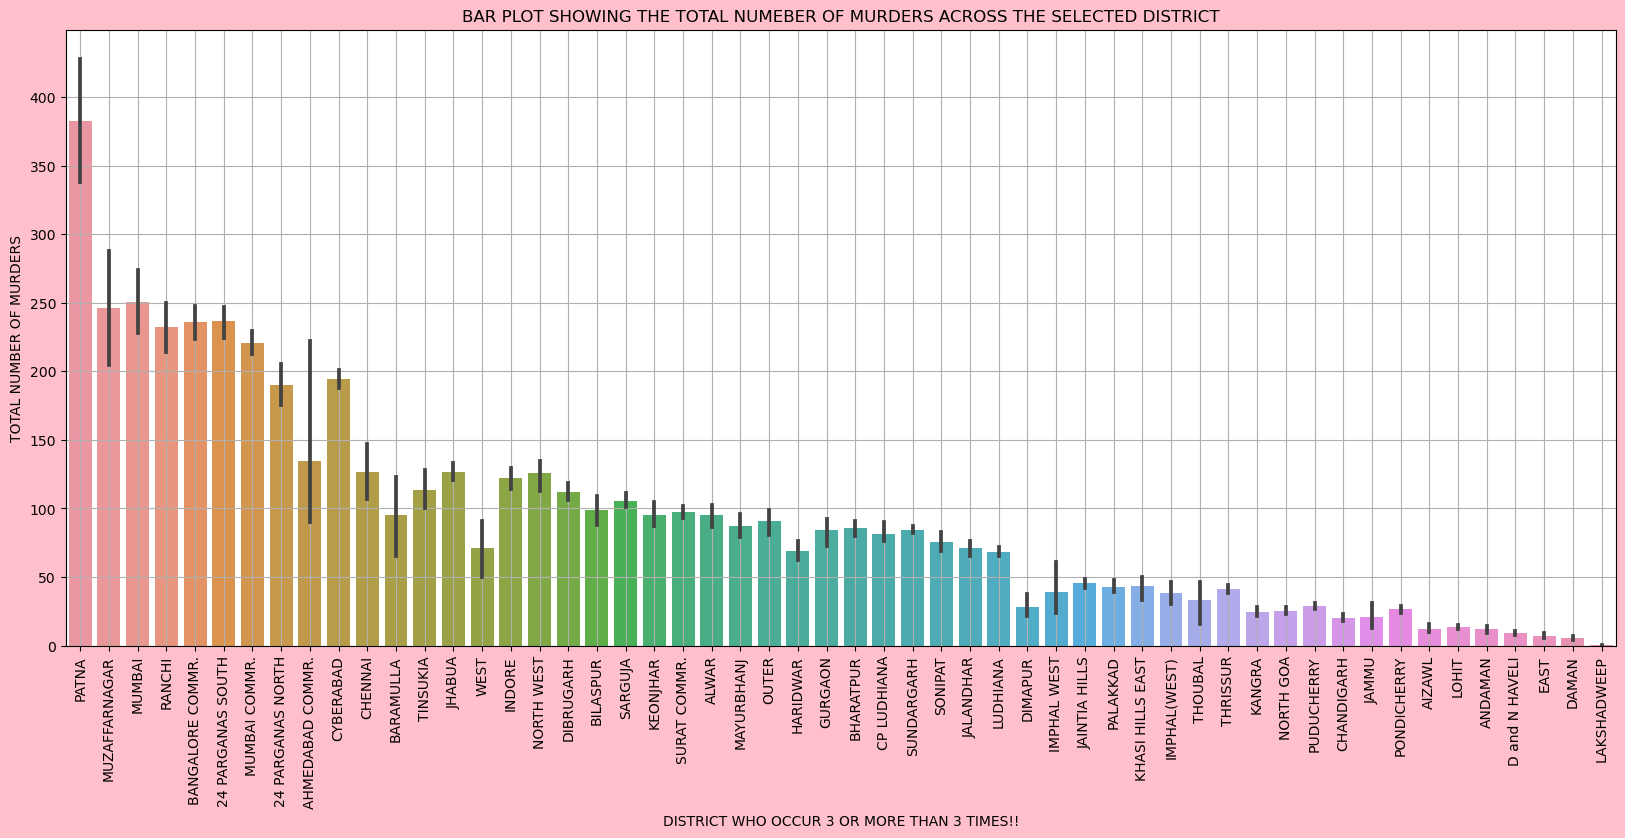

In [92]:
plt.figure(figsize=(20,8),facecolor='Pink')
sns.barplot(x=new_data['DISTRICT'],y=new_data['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.grid()
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT")
plt.show()

WE CAN SEE THAT PATNA HAS THE HIGHEST NUMBER OF MUDERS.

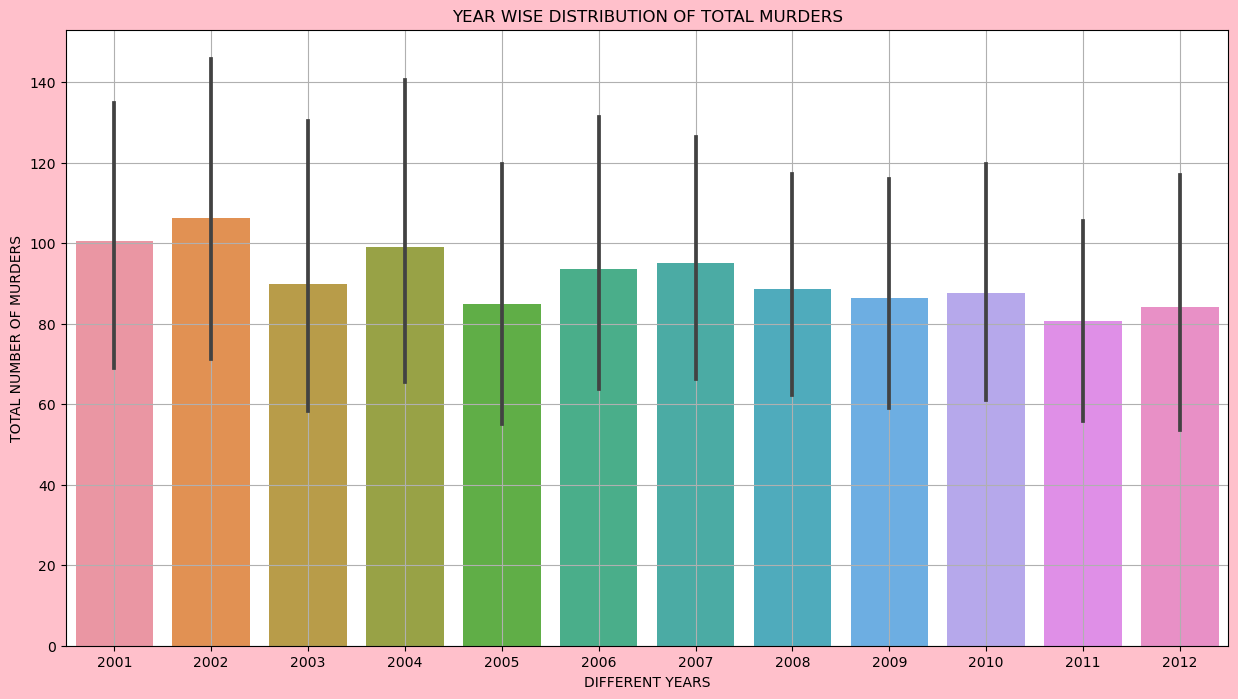

In [93]:
plt.figure(figsize=(15,8),facecolor='Pink')
sns.barplot(x=new_data['YEAR'],y=new_data['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS")
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.title("YEAR WISE DISTRIBUTION OF TOTAL MURDERS")
plt.grid()
plt.show()

THE HIGHEST NUMBER OF MUDER CASES ARE SEEN IN THE YEAR 2002 AND THERE IS A DIP IN THE YEAR 2011.

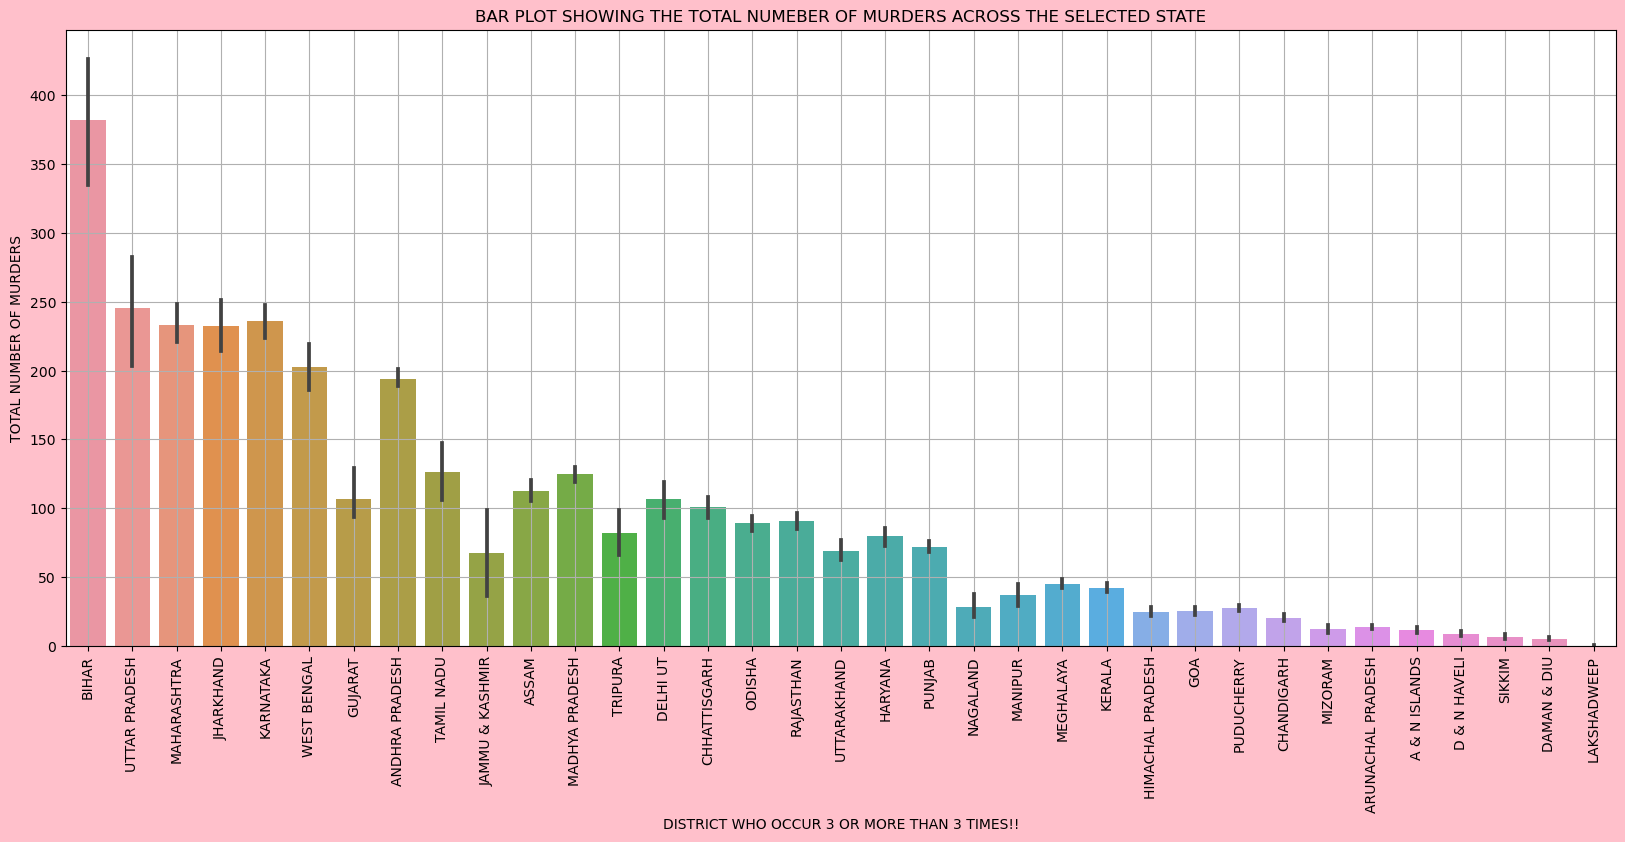

In [105]:
plt.figure(figsize=(20,8),facecolor='Pink')
sns.barplot(x=new_data['STATE/UT'],y=new_data['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.grid()
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED STATE")
plt.show()

BIHAR HAS THE HIGHEST RATE OF MUDER CASE AND LAKSHADWEEP HAS THE LEAST MUDER CASE.
IT MAY BE DUE TO LOW POPULATION RATE.